# News Mood Analysis 
#### Objective: Perform a sentiment analysis of the Twitter activity of various news organizations, and create data visualizations to present findings. 
## Observed Trends 
* The scatter plot shows sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible. We see that CBS is concentrated more on the positive side of the plot, whereas the the other news organizations seem more evenly spread out. 
* The bar plot is much clearer in showing differences between overall sentiments for each news organization. CBS is most positive, with a mean compound score of 0.3385, followed by BBC, which is slightly positive with a score of 0.0884. CNN and NYTimes had similar negative scores, -0.0747 and -0.0710, respectively. Fox had the score closest to neutral, with -0.0209. 
* It's important to note that these results only take into account the 100 most recent tweets and results may be more representative of a news organization if the timeframe was expanded. 


In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from configNA import consumer_key, consumer_secret, access_token, access_token_secret
from pprint import pprint
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Set target twitter accounts 
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Lists to hold user accounts, tweets, dates, & sentiments
user_acct = []
tweet_txt = []
tweet_dt =[]
# Vader lists 
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [5]:
# Loop through all twitter accounts 
for target in target_users:
    
    # Loop through 5 times (100 tweets)
    for x in range(5):
        
        # Get tweets for one page for each user (20 tweets)
        public_tweets = api.user_timeline(target, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list 
            user_acct.append(target)
            tweet_txt.append(tweet["text"])
            tweet_dt.append(tweet["created_at"])
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

In [9]:
# Convert tweet timestamps to datetime objects
converted_timestamps = []
for dt in tweet_dt:
    converted_time = datetime.strptime(dt, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
    
# Confirm length of list 
print(len(converted_timestamps))

500


In [11]:
# Create dataframe for all accounts and tweets
df = pd.DataFrame({"Account":user_acct,
                   "Tweet Text":tweet_txt,
                   "Date":converted_timestamps,
                   "Compound":compound_list,
                   "Positive":positive_list,
                   "Negative":negative_list,
                   "Neutral":neutral_list
                  })
df.head()
# Reorder columns 
df2 = df[['Account', 'Date', 'Tweet Text', 'Compound', 'Positive', 'Neutral', 'Negative']]
df2.head()

,Account,Date,Tweet Text,Compound,Positive,Neutral,Negative
0,@BBC,2018-03-20 19:48:04+00:00,"This #WorldFrogDay, why not try making an orig...",0.0000,0.000,1.000,0.000
1,@BBC,2018-03-20 19:03:04+00:00,Michael Portillo travels across India guided b...,0.0000,0.000,1.000,0.000
2,@BBC,2018-03-20 18:33:01+00:00,Can you watch this without laughing? 😹🔊 You'll...,-0.3859,0.071,0.768,0.160
3,@BBC,2018-03-20 17:33:03+00:00,Professor Stephen Hawking's funeral will take ...,0.3400,0.160,0.738,0.102
4,@BBC,2018-03-20 17:03:01+00:00,Un-bee-lievable! 🐝😍 Meet the woman who kept a ...,0.0000,0.000,1.000,0.000


In [12]:
#Save df to csv
df2.to_csv("newstweets.csv",index=False)

In [13]:
# Filter df2 by user account for plotting 
bbc = df2.loc[df2["Account"] == "@BBC"]
cbs = df2.loc[df2["Account"] == "@CBS"]
cnn = df2.loc[df2["Account"] == "@CNN"]
fox = df2.loc[df2["Account"] == "@FoxNews"]
nyt = df2.loc[df2["Account"] == "@nytimes"] 

In [42]:
# Sort dfs by relative timestamp - date, ascending = False 
bbc = bbc.sort_values("Date", ascending=False)
cbs = cbs.sort_values("Date", ascending=False)
cnn = cnn.sort_values("Date", ascending=False)
fox = fox.sort_values("Date", ascending=False)
nyt = nyt.sort_values("Date", ascending=False)

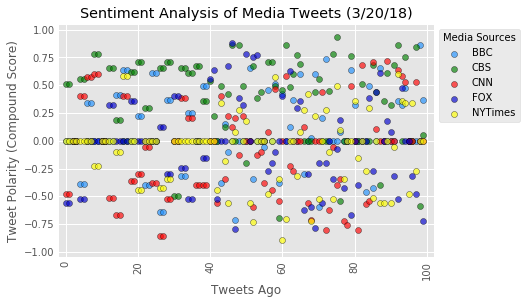

In [44]:
from matplotlib import style
style.use('ggplot')

x_axis = np.arange(0,100)

# Plot all compound scores by user 
plt.scatter(x_axis, bbc["Compound"], edgecolor="black", color='dodgerblue', marker="o",alpha=0.65, label="BBC")
plt.scatter(x_axis, cbs["Compound"], edgecolor="black", color='green', marker="o", alpha=0.65, label="CBS")
plt.scatter(x_axis, cnn["Compound"], edgecolor="black", color='red', marker="o", alpha=0.65, label="CNN")
plt.scatter(x_axis, fox["Compound"], edgecolor="black", color='mediumblue', marker="o", alpha=0.65, label="FOX")
plt.scatter(x_axis, nyt["Compound"], edgecolor="black", color='yellow', marker="o", alpha=0.65, label="NYTimes")

# Set title and axis labels
plt.title("Sentiment Analysis of Media Tweets (3/20/18)")
plt.ylabel("Tweet Polarity (Compound Score)")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1, 1),title="Media Sources")
plt.xticks(rotation="vertical")
plt.xlim(-2,102)
plt.ylim([-1.05, 1.05])

# Save and show the figure
plt.savefig("SentimentAnalysisScatterplot.png")
plt.show()

In [26]:
# Store average sentiments separately 
bbc_mean = bbc["Compound"].mean()
cbs_mean = cbs["Compound"].mean()
cnn_mean = cnn["Compound"].mean()
fox_mean = fox["Compound"].mean()
nyt_mean = nyt["Compound"].mean()

# Create mean df 
mean_scores = pd.DataFrame ({"BBC": [bbc_mean],
                             "CBS": [cbs_mean],
                             "CNN": [cnn_mean],
                             "Fox": [fox_mean],
                             "NYT": [nyt_mean]
                             })
mean_scores = mean_scores.round(4)
mean_scores.index = ['Mean Cmpd Scores']

# Save df to csv 
mean_scores.to_csv("mean_cmpd_scores.csv")

# Print df 
mean_scores

,BBC,CBS,CNN,Fox,NYT
Mean Cmpd Score,0.0884,0.3385,-0.0747,-0.0209,-0.071


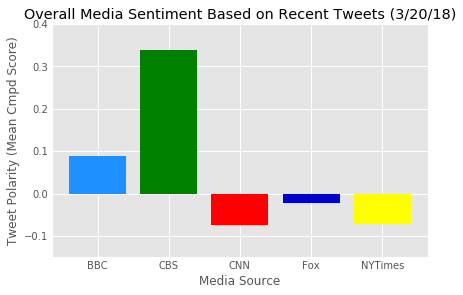

In [38]:
from matplotlib import style
style.use('ggplot')

# Create bar plot w/ overall sentiments 
x_axis = np.arange(5)
means = [bbc_mean, cbs_mean, cnn_mean, fox_mean, nyt_mean]
colors = ['dodgerblue', 'green', 'red', 'mediumblue', 'yellow']
plt.bar(x_axis, means, align='edge', color=colors)

# Set title and axis labels
plt.title("Overall Media Sentiment Based on Recent Tweets (3/20/18)")
plt.xlabel("Media Source")
plt.ylabel("Tweet Polarity (Mean Cmpd Score)")
tick_locations = [value+0.4 for value in x_axis]
tick_label = ['BBC','CBS','CNN','Fox','NYTimes']
plt.xticks(tick_locations, tick_label)
plt.ylim([-0.15, 0.4])

# Save and show the figure
plt.savefig("SentimentAnalysisBarplot.png")
plt.show()